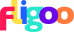

<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or custumer identification were deleted.

**Take-Home Goals**
- During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
- In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - Feature extraction: Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
  - Machine Learning modeling: at least one fitted model with the given data. You could use the `children` column as target.
- Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  
**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Dockerfile to setup environment / Conda environment for isolation.
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.


## Part I - Exploratory Data Analisys

In [1]:
import pandas as pd

df = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv')

In [2]:
df.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date
0,City_Hotel,217,1,3,2,none,BB,DEU,Offline_TA/TO,TA/TO,...,A,A,0,No_Deposit,0,Transient-Party,80.75,none,1,2016-09-01
1,City_Hotel,2,0,1,2,none,BB,PRT,Direct,Direct,...,D,K,0,No_Deposit,0,Transient,170.00,none,3,2017-08-25
2,Resort_Hotel,95,2,5,2,none,BB,GBR,Online_TA,TA/TO,...,A,A,2,No_Deposit,0,Transient,8.00,none,2,2016-11-19
3,Resort_Hotel,143,2,6,2,none,HB,ROU,Online_TA,TA/TO,...,A,A,0,No_Deposit,0,Transient,81.00,none,1,2016-04-26
4,Resort_Hotel,136,1,4,2,none,HB,PRT,Direct,Direct,...,F,F,0,No_Deposit,0,Transient,157.60,none,4,2016-12-28


In [3]:
df.shape

(50000, 23)

In [4]:
df.columns

Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'arrival_date'],
      dtype='object')

In [5]:
df.isnull().sum() #la columna country es la unica que tiene valores nulos, como representa el 0.5% de nuestros datos vamos a droppear esas columnas

hotel                               0
lead_time                           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
meal                                0
country                           289
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
average_daily_rate                  0
required_car_parking_spaces         0
total_of_special_requests           0
arrival_date                        0
dtype: int64

In [6]:
df = df.dropna(axis = 0)

In [7]:
df.isnull().sum()

hotel                             0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
average_daily_rate                0
required_car_parking_spaces       0
total_of_special_requests         0
arrival_date                      0
dtype: int64

#
# Perform your exploratory data analysis...
#

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49711 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           49711 non-null  object 
 1   lead_time                       49711 non-null  int64  
 2   stays_in_weekend_nights         49711 non-null  int64  
 3   stays_in_week_nights            49711 non-null  int64  
 4   adults                          49711 non-null  int64  
 5   children                        49711 non-null  object 
 6   meal                            49711 non-null  object 
 7   country                         49711 non-null  object 
 8   market_segment                  49711 non-null  object 
 9   distribution_channel            49711 non-null  object 
 10  is_repeated_guest               49711 non-null  int64  
 11  previous_cancellations          49711 non-null  int64  
 12  previous_bookings_not_canceled  

In [10]:
df.describe() #revisamos las variables numericas

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,total_of_special_requests
count,49711.000000,49711.000000,49711.000000,49711.000000,49711.000000,49711.000000,49711.000000,49711.000000,49711.000000,49711.000000,49711.000000
mean,80.445233,0.930237,2.467120,1.832814,0.043391,0.016676,0.195570,0.295146,1.579530,100.166121,0.713846
std,91.289597,0.990358,1.917636,0.507983,0.203737,0.288350,1.794438,0.740848,14.832745,48.978962,0.833908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,9.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000
50%,46.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,1.000000
75%,125.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,1.000000
max,709.000000,16.000000,41.000000,4.000000,1.000000,13.000000,72.000000,21.000000,379.000000,510.000000,5.000000


In [11]:
df['children'].value_counts()

none        45685
children     4026
Name: children, dtype: int64

## Exploremos cada una de las variables

In [12]:
#Empezamos viendo la variable target " children" , y su relacion con la de "adultos" 

In [13]:
df["children"] = df["children"].replace({'none':0, 
                                     'children' :1}) #volvemos esta variable numerica para graficarla

In [14]:
df1 = df[['adults', 'children']].copy()

In [15]:
stacked = df1.stack().to_frame().reset_index()
stacked = stacked.drop(columns=['level_0'])
stacked = stacked.rename(columns={0: "cantidad"})

In [16]:
stacked = stacked.groupby(by=["level_1"])['cantidad'].sum().to_frame()

In [17]:
stacked

,cantidad
level_1,
adults,91111
children,4026


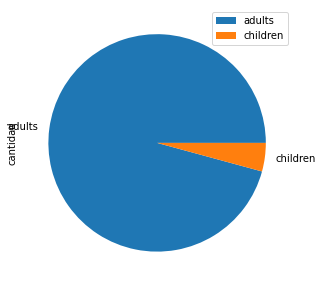

In [18]:
plot = stacked.plot.pie(y='cantidad', figsize=(5, 5)) 

In [19]:
#En este punto entendemos que tenemos dos escalas diferentes ya que contamos con la cantidad de adultos, peor no con la cantidad de niños.
#Aca solo podemos saber que de la totalidad de adultos en los hoteles, el 4% de los adultos han llevado niños al hotel.

In [20]:
#Veamos la cantidad de niños por hotel

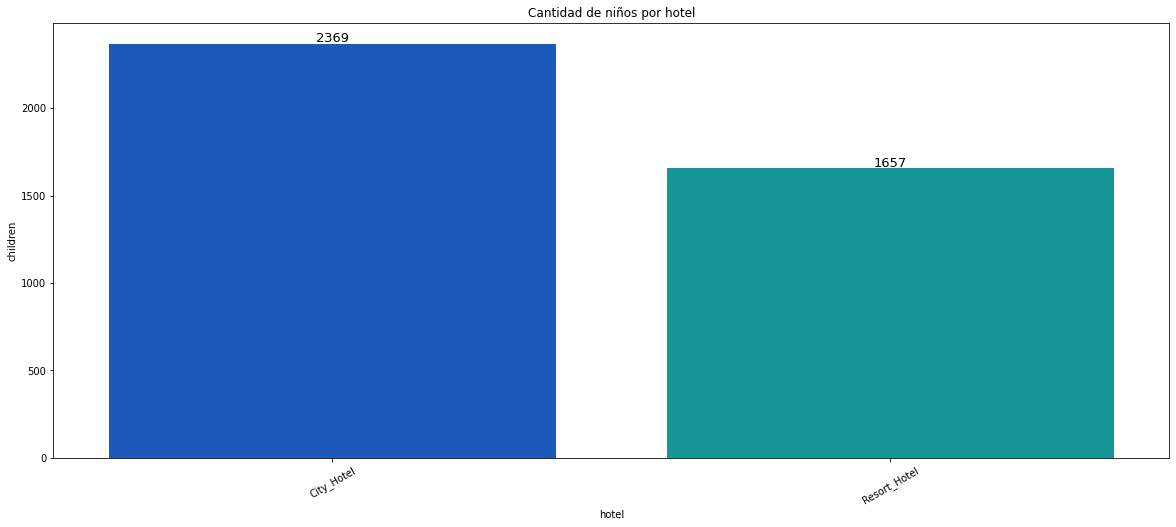

In [21]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="hotel", 
            y="children",
            data= df,estimator=sum,ci=None, palette="winter", ax=ax)
chart.set_title('Cantidad de niños por hotel')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [22]:
#Encontramos que hay mas niños en el hotel de la ciudad , que en el Resort

In [23]:
stay = (df.groupby(df['children'])
         .agg({'stays_in_week_nights':'sum', 'stays_in_weekend_nights':'sum'})
         .reset_index())
stay = stay.set_index('children')

In [24]:
stay = stay.stack().to_frame().reset_index()
stay = stay.rename(columns={"level_1": "tipo_de_estadia", 0: "cantidad" })
stay.head()

,children,tipo_de_estadia,cantidad
0,0,stays_in_week_nights,112118
1,0,stays_in_weekend_nights,42145
2,1,stays_in_week_nights,10525
3,1,stays_in_weekend_nights,4098


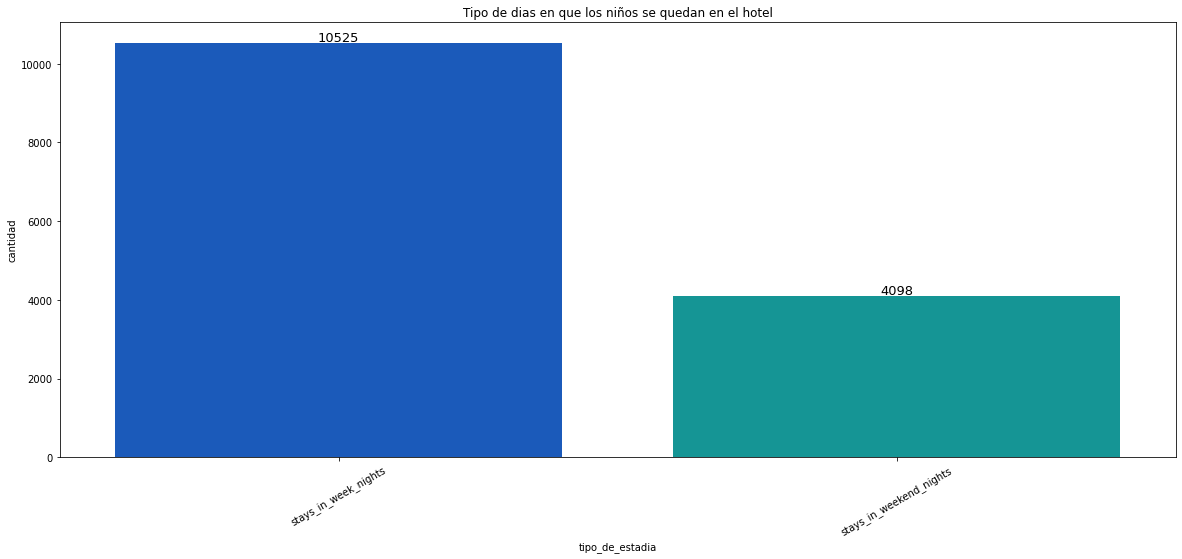

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="tipo_de_estadia", 
            y="cantidad",
            data= stay.loc[stay['children'] == 1],estimator=sum,ci=None, palette="winter", ax=ax)
chart.set_title('Tipo de dias en que los niños se quedan en el hotel')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [26]:
# La mayoria de los niños se quedan en los hoteles las noches de semana, y no las de fin de semana.
# Esperabamos que fuera al reves considerando que suelen tener clases en la escuela todos los dias de la semana, pero al saber que no se quedan en resorts,
# podemos pensar que su estadía no se debe a vacaciones, sino quizas a mudanzas u otros procesos que esten atravesando sus padres.

In [27]:
# Veamos cuando llegan la mayoria de los niños al hotel 

In [28]:
df['month'] = pd.to_datetime(df['arrival_date']) 
df['month'] = df['month'].dt.strftime('%m')

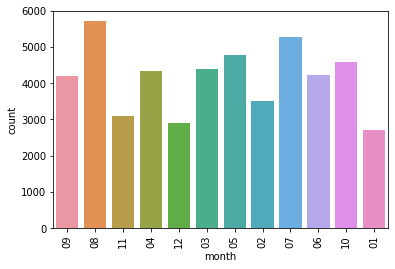

In [29]:
sns.countplot(x=df['month'], data=df.loc[df['children'] == 1])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (18, 8)
plt.show()

In [30]:
#En los meses de julio y agosto existen mas llegadas de niños al hotel, lo cual tiene sentido porque son meses de vacaciones escolares.
#Si nos situamos en el hemisferio norte, encontramos que estos meses son los de verano, y por lo tanto ahí estan establecidas las vacaciones de verano,
#y los niños pueden viajar con sus familias.

In [31]:
df['year'] = pd.to_datetime(df['arrival_date']) 
df['year'] = df['year'].dt.strftime('%Y')

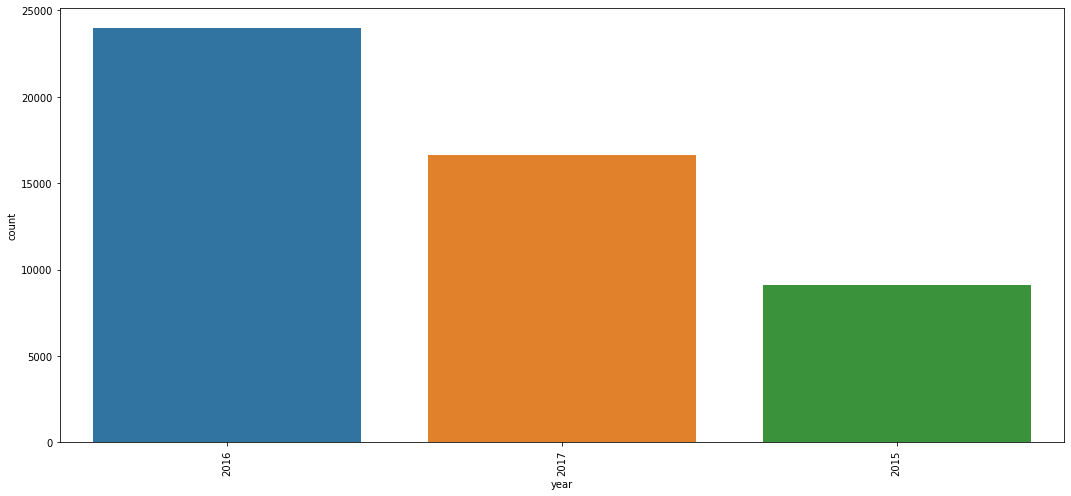

In [32]:
sns.countplot(x=df['year'], data=df.loc[df['children'] == 1])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (18, 8)
plt.show()

In [33]:
#En el año 2016 es cuando llegaron mas niños, luego en el año 2017 descendio la cantidad de niños que llegaban a los hoteles.

In [34]:
df = df.drop(columns=['month', 'year']) #dropeamos las columnas que creamos porque no vamos a necesitarlas por ahora 

In [35]:
#Ahora veamos la variable market segment para descubrir que valores tiene 

In [36]:
df.market_segment.value_counts(normalize=True)

Online_TA        0.476896
Offline_TA/TO    0.213031
Direct           0.141337
Groups           0.103036
Corporate        0.054676
Complementary    0.008570
Aviation         0.002454
Name: market_segment, dtype: float64

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


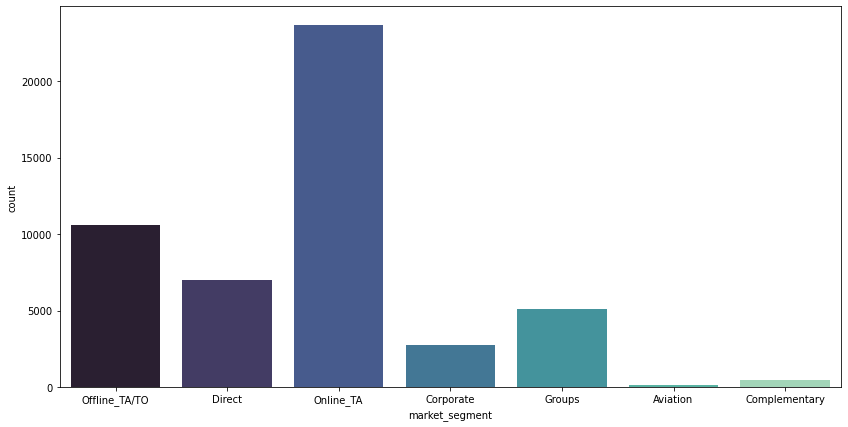

In [37]:
plt.figure(figsize=(14,7))
sns.countplot(df['market_segment'], palette='mako')
plt.show()

In [38]:
# Los tipos de clientes que tenemos

In [39]:
df.customer_type.value_counts(normalize=True)

Transient          0.705598
Transient-Party    0.249703
Contract           0.037497
Group              0.007202
Name: customer_type, dtype: float64

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


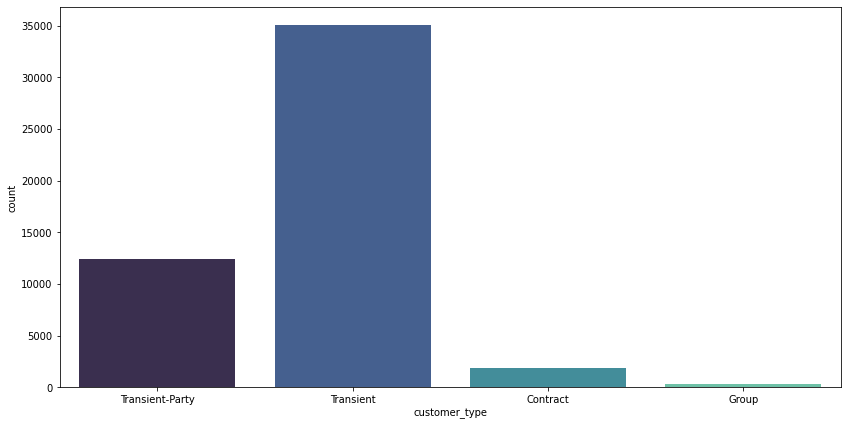

In [40]:
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'], palette='mako')
plt.show()

In [41]:
# Veamos de que paises son las personas que vienen a los hoteles

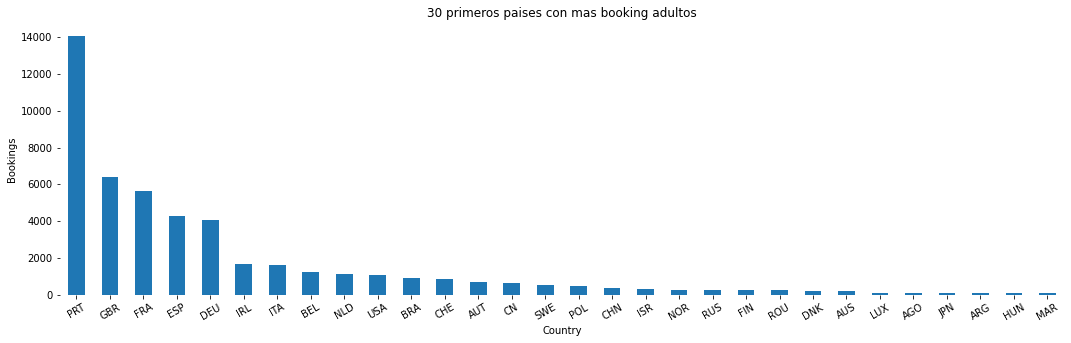

In [42]:
pais = df['country'].value_counts()
plt.figure(figsize=(18,5))
pais.sort_values(ascending=False)[:30].plot(kind='bar')
plt.xticks(rotation=30)
sns.despine(bottom = True, left = True)
plt.xlabel("Country")
plt.ylabel("Bookings")
plt.title("30 primeros paises con mas booking adultos")
plt.show()

In [43]:
# Veamos de que paises son los niños que vienen a los hoteles

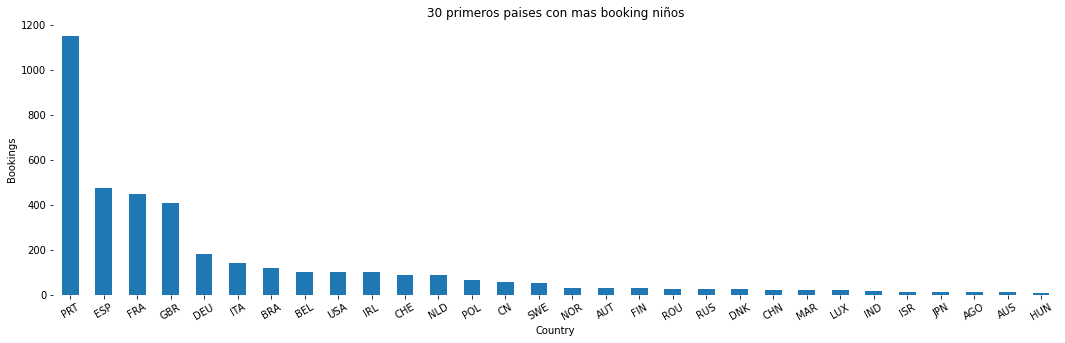

In [44]:
data = df.loc[df['children'] == 1]
pais = data['country'].value_counts()
plt.figure(figsize=(18,5))
pais.sort_values(ascending=False)[:30].plot(kind='bar')
plt.xticks(rotation=30)
sns.despine(bottom = True, left = True)
plt.xlabel("Country")
plt.ylabel("Bookings")
plt.title("30 primeros paises con mas booking niños")
plt.show()

In [45]:
# La mayoria de los niños vienen de portugal al igual que los adultos, pero en segundo lugar de españa, a diferencia de los anteriores.

In [46]:
# Vemos la variable Meal 

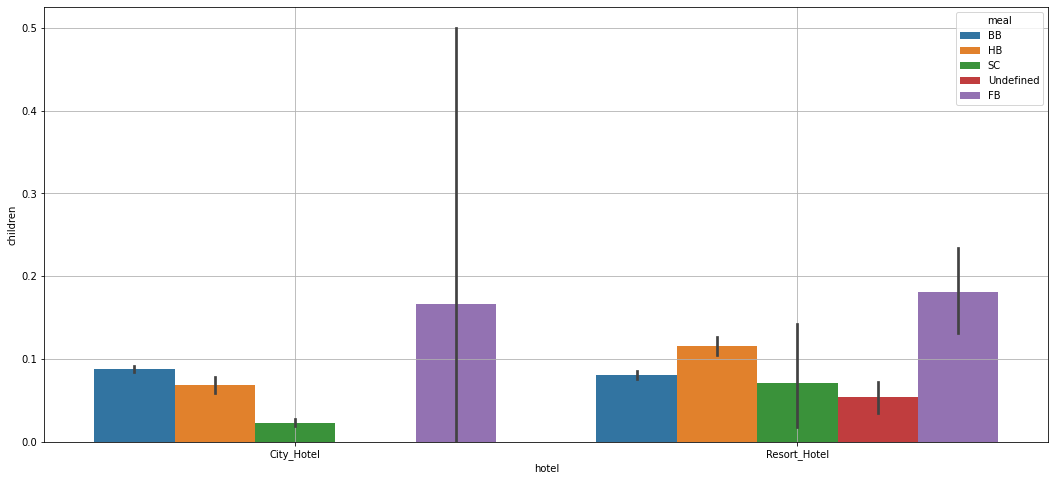

In [47]:
sns.barplot(data=df, x='hotel', y='children', hue='meal')
plt.grid()
plt.show()

In [48]:
# Tipo de habitacion que reservan los niños y que les terminan asignando

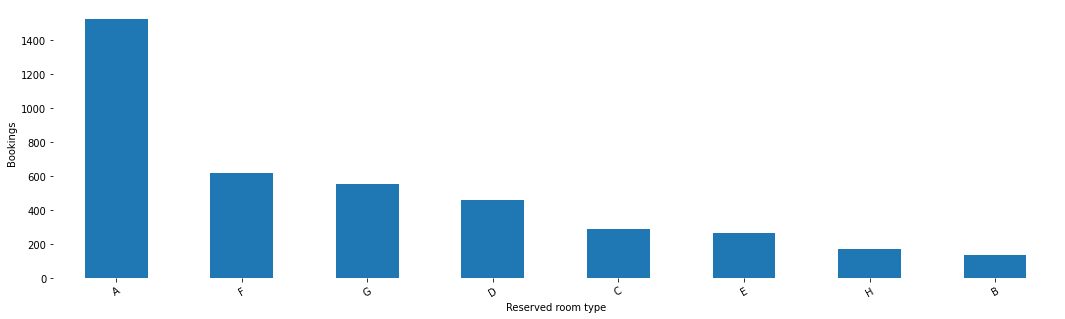

In [49]:
data = df.loc[df['children'] == 1]
rev = data['reserved_room_type'].value_counts()
plt.figure(figsize=(18,5))
rev.plot(kind='bar')
plt.xticks(rotation=30)
sns.despine(bottom = True, left = True)
plt.xlabel("Reserved room type")
plt.ylabel("Bookings")
plt.show()

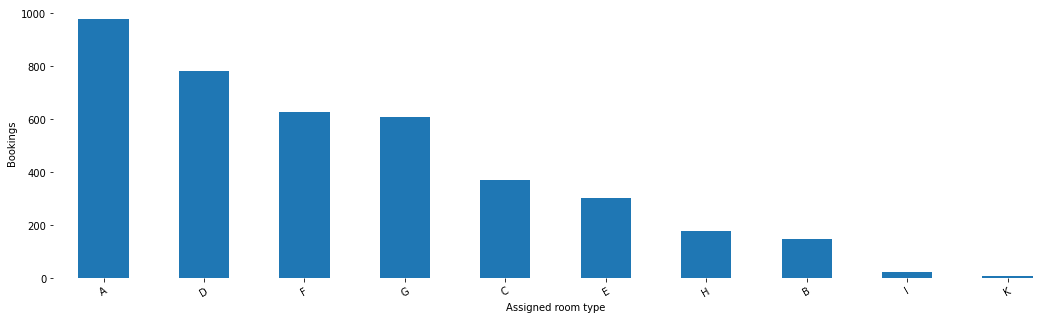

In [50]:
data = df.loc[df['children'] == 1]
rev = data['assigned_room_type'].value_counts()
plt.figure(figsize=(18,5))
rev.plot(kind='bar')
plt.xticks(rotation=30)
sns.despine(bottom = True, left = True)
plt.xlabel("Assigned room type")
plt.ylabel("Bookings")
plt.show()

In [51]:
#Los padres con niños suelen reservarles la habitacion tipo A y conseguirla. Pero en segundo lugar le reservan la tipo F, y consiguen la tipo D.

In [52]:
# Veamos los cambios en las reservas

In [53]:
df['booking_changes'].value_counts() #tomaremos como cierto que 0 es que no se hicieron cambios en las reservas

0     39594
1      7227
2      2007
3       522
4       211
5        71
6        31
7        13
8        11
9         6
10        4
13        3
15        3
17        2
11        2
18        1
16        1
21        1
12        1
Name: booking_changes, dtype: int64

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


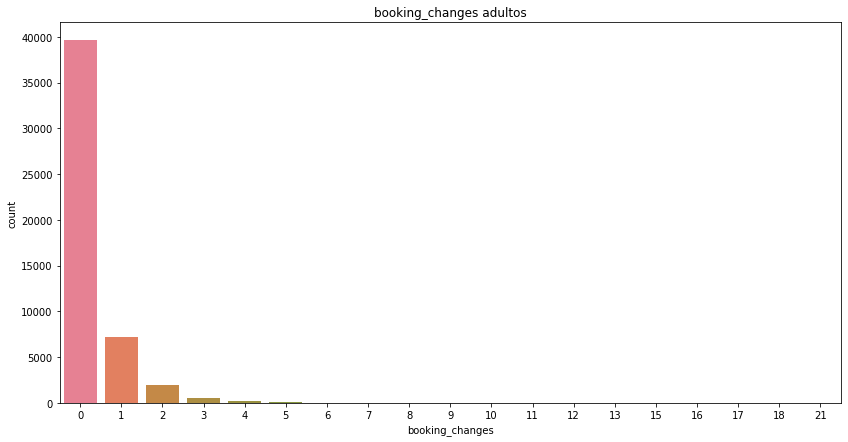

In [54]:
plt.figure(figsize=(14,7))
sns.countplot(df['booking_changes'], palette='husl')
plt.title('booking_changes adultos')
plt.show()

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


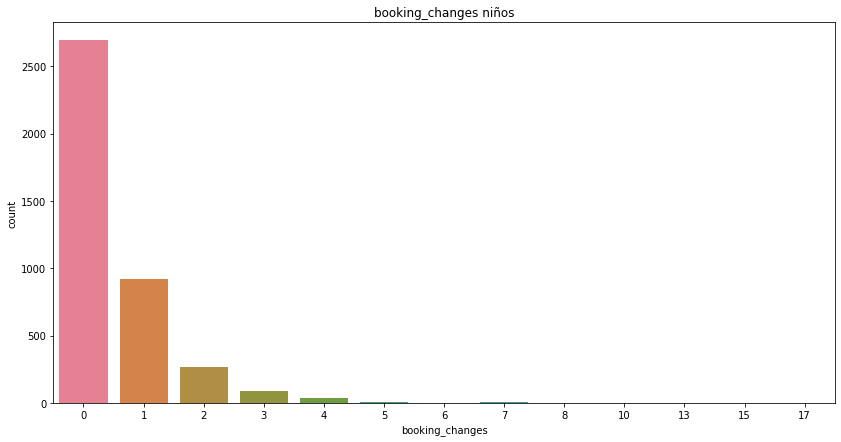

In [55]:
data = df.loc[df['children'] == 1]
plt.figure(figsize=(14,7))
sns.countplot(data['booking_changes'], palette='husl')
plt.title('booking_changes niños')
plt.show()

In [56]:
#Los niños no son un factor a la hora de hacer cambios en las reservas. Es probable que los cambios en las reservas se deban a factores externos
#a los niños, que tengan que ver con temas exclusivos de los adultos a cargo.

In [57]:
# Veamos distribution channel 

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


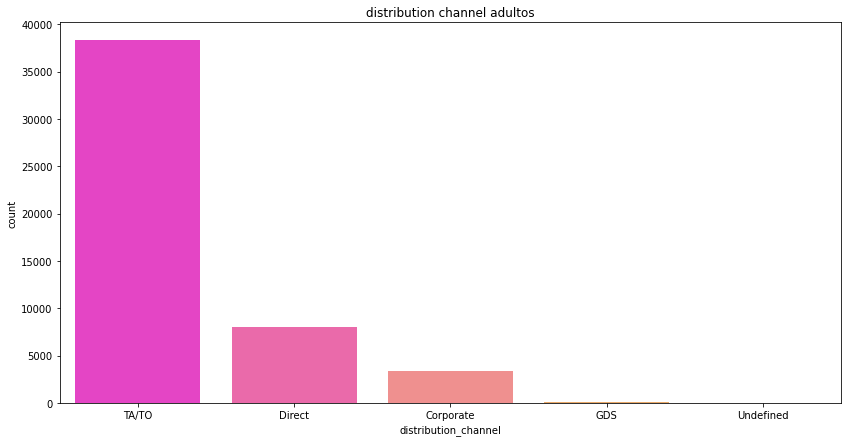

In [58]:
plt.figure(figsize=(14,7))
sns.countplot(df['distribution_channel'], palette='spring')
plt.title('distribution channel adultos')
plt.show()

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


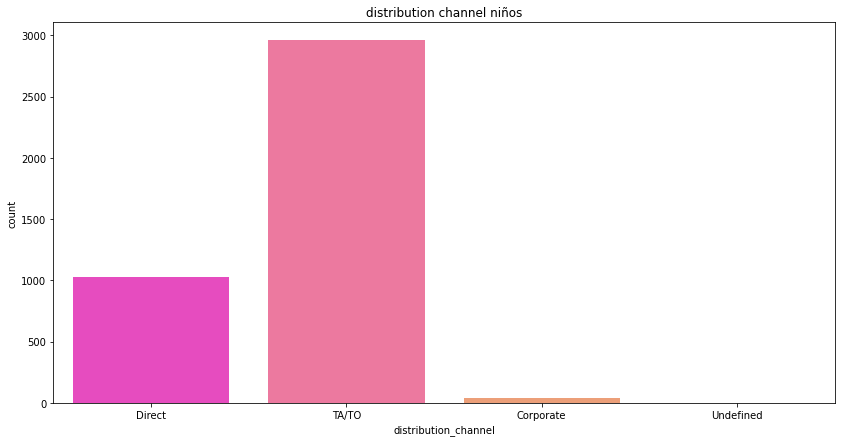

In [59]:
data = df.loc[df['children'] == 1]
plt.figure(figsize=(14,7))
sns.countplot(data['distribution_channel'], palette='spring')
plt.title('distribution channel niños')
plt.show()

In [60]:
#Las distribuciones entre niños y adultos son similares.

In [61]:
# Veamos las cancelaciones previas que existieron y que no en total, y luego en los niños 

In [62]:
df['previous_cancellations'].describe()

count    49711.000000
mean         0.016676
std          0.288350
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: previous_cancellations, dtype: float64

In [63]:
canc = (df.groupby(df['children'])
         .agg({'previous_cancellations':'sum', 'previous_bookings_not_canceled':'sum'})
         .reset_index())
canc = canc.set_index('children')

In [64]:
canc = canc .stack().to_frame().reset_index()
canc = canc.rename(columns={"level_1": "cancelaciones_en_bookings", 0: "cantidad" })
canc .head()

,children,cancelaciones_en_bookings,cantidad
0,0,previous_cancellations,828
1,0,previous_bookings_not_canceled,9636
2,1,previous_cancellations,1
3,1,previous_bookings_not_canceled,86


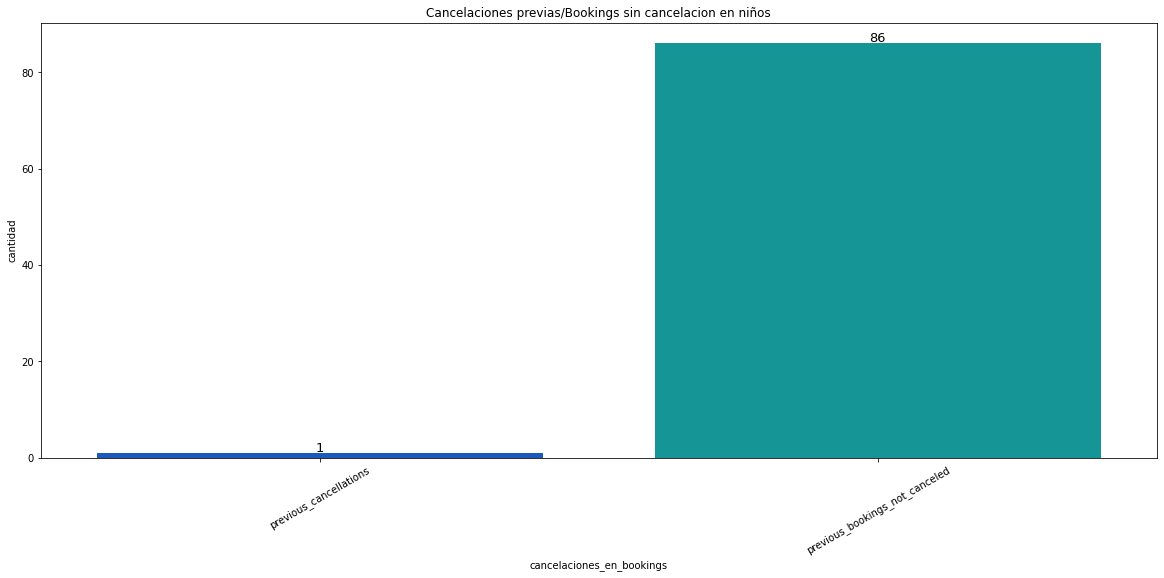

In [65]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="cancelaciones_en_bookings", 
            y="cantidad",
            data= canc.loc[canc['children'] == 1],estimator=sum,ci=None, palette="winter", ax=ax)
chart.set_title('Cancelaciones previas/Bookings sin cancelacion en niños')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [66]:
#La mayoria de los bookings no han tenido cancelacion previa, y los niños no parecen ser un factor que afecte el comportamiento de esta variable

In [67]:
# Veamos ahora si los niños suelen ser huespedes que repiten su estadia

In [68]:
df['is_repeated_guest'].value_counts()

0    47554
1     2157
Name: is_repeated_guest, dtype: int64

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


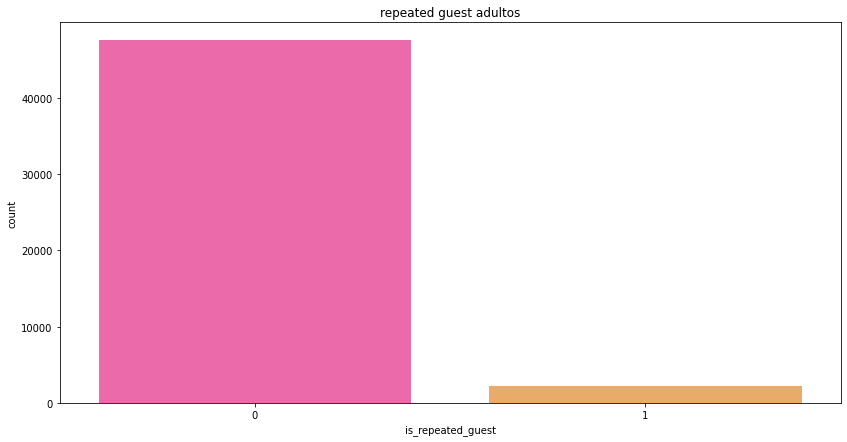

In [69]:
plt.figure(figsize=(14,7))
sns.countplot(df['is_repeated_guest'], palette='spring')
plt.title('repeated guest adultos')
plt.show()

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


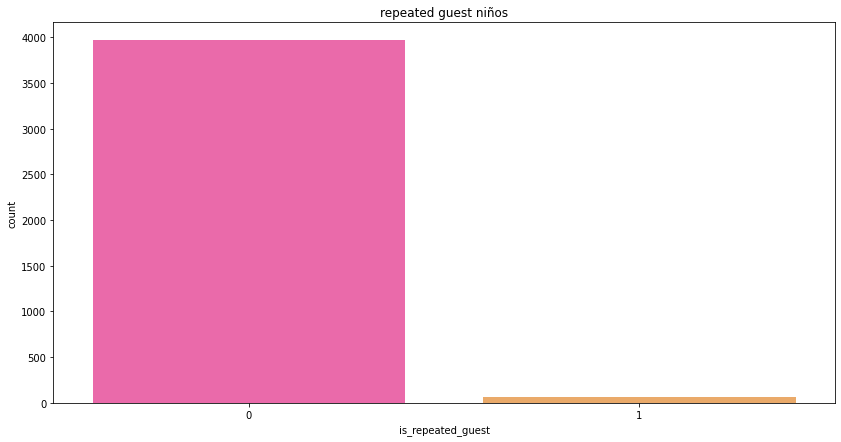

In [70]:
data = df.loc[df['children'] == 1]
plt.figure(figsize=(14,7))
sns.countplot(data['is_repeated_guest'], palette='spring')
plt.title('repeated guest niños')
plt.show()

In [71]:
#Los ninos parecen repetir menos su estadia en los hoteles que los adultos

In [72]:
# Investiguemos la variable 'deposit_type'

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


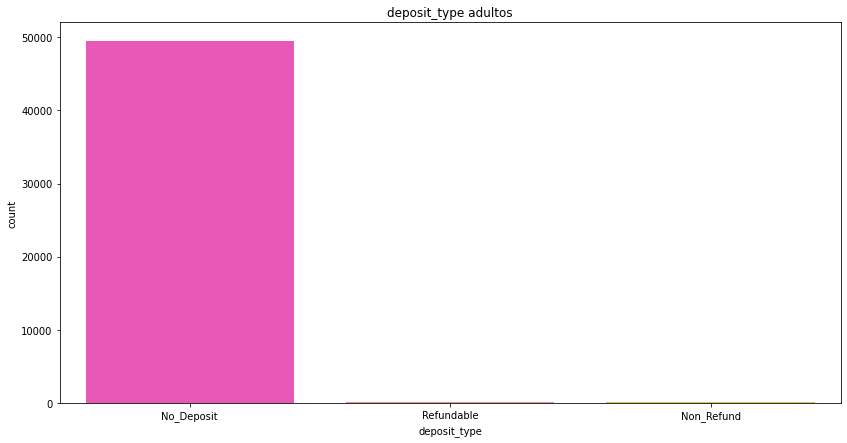

In [73]:
plt.figure(figsize=(14,7))
sns.countplot(df['deposit_type'], palette='spring')
plt.title('deposit_type adultos')
plt.show()

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


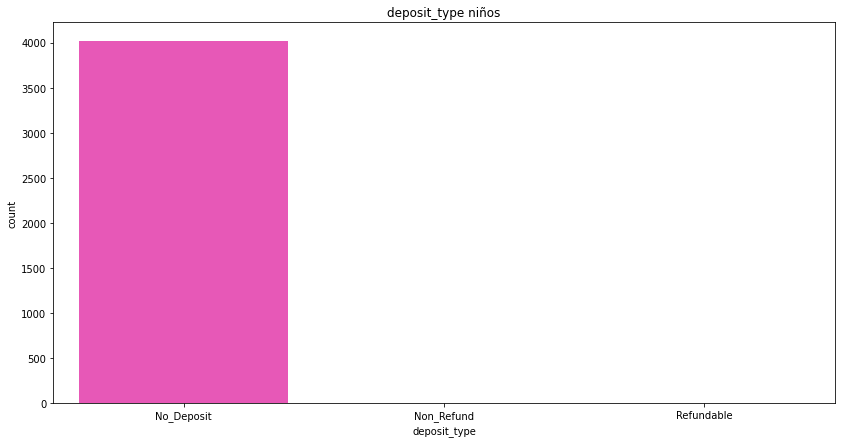

In [74]:
data = df.loc[df['children'] == 1]
plt.figure(figsize=(14,7))
sns.countplot(data['deposit_type'], palette='spring')
plt.title('deposit_type niños')
plt.show()

In [75]:
#Nuevamente encontramos comportamientos similares a los adultos en la variable deposito

In [76]:
# Investiguemos la variable 'days_in_waiting_list'

In [77]:
df['days_in_waiting_list'].value_counts()
#Esta variable no va a servirnos porque casi todos sus valores son de 0, es decir que no suelen tener listas de espera para hacer un booking de adultos o niños

0      48827
58       114
87        47
38        34
63        34
       ...  
52         1
37         1
81         1
167        1
72         1
Name: days_in_waiting_list, Length: 92, dtype: int64

In [78]:
# Investiguemos la variable 'average_daily_rate'

In [79]:
df['average_daily_rate'].describe()

count    49711.000000
mean       100.166121
std         48.978962
min         -6.380000
25%         68.000000
50%         93.000000
75%        125.000000
max        510.000000
Name: average_daily_rate, dtype: float64

In [80]:
data = df.loc[df['children'] == 1]
data['average_daily_rate'].describe()

count    4026.000000
mean      148.329101
std        65.035597
min         0.000000
25%       102.085000
50%       143.600000
75%       188.422500
max       451.500000
Name: average_daily_rate, dtype: float64

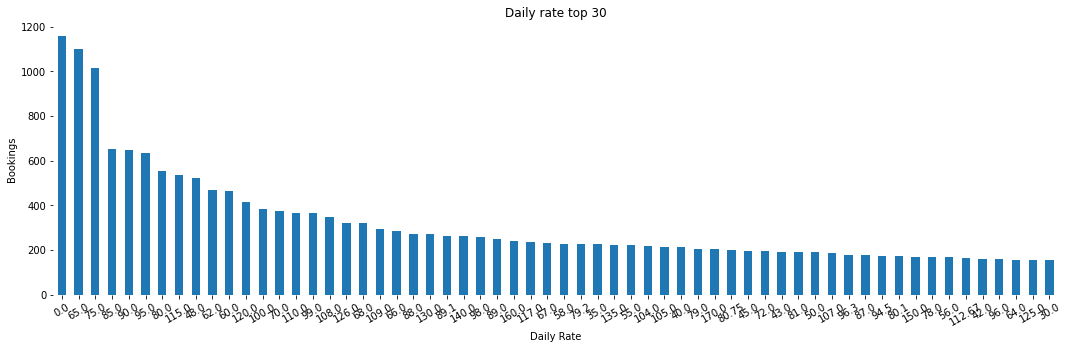

In [81]:
daily = df['average_daily_rate'].value_counts()
plt.figure(figsize=(18,5))
daily.sort_values(ascending=False)[:30].plot(kind='bar')
plt.xticks(rotation=30)
sns.despine(bottom = True, left = True)
plt.xlabel("Daily Rate")
plt.ylabel("Bookings")
plt.title("Daily rate top 30")
plt.show()

In [82]:
#En esta variable específica encontramos valores diversos en nuestros minimos y maximos para adultos y niños. 
#Puede ser una variable importante para predecir entonces nuestro target 

In [83]:
# Investiguemos la variable 'lead_time'

In [84]:
df['lead_time'].describe() 

count    49711.000000
mean        80.445233
std         91.289597
min          0.000000
25%          9.000000
50%         46.000000
75%        125.000000
max        709.000000
Name: lead_time, dtype: float64

In [85]:
data = df.loc[df['children'] == 1]
data['lead_time'].describe()

count    4026.000000
mean       76.168157
std        77.793067
min         0.000000
25%        11.000000
50%        48.000000
75%       128.000000
max       424.000000
Name: lead_time, dtype: float64

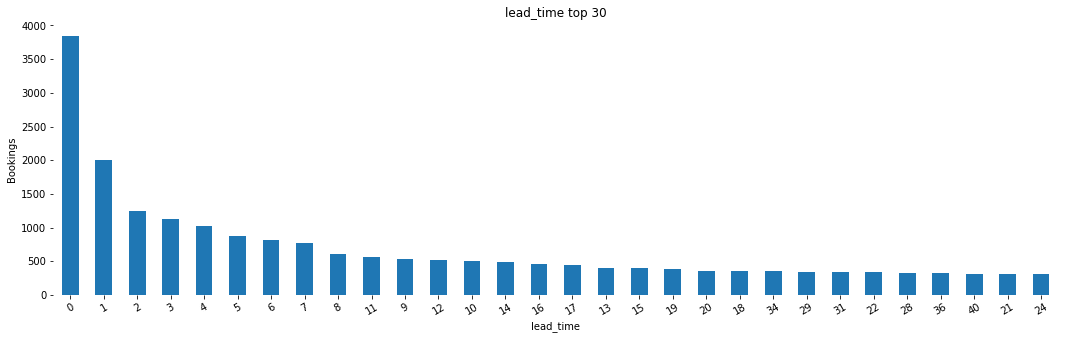

In [86]:
lead = df['lead_time'].value_counts()
plt.figure(figsize=(18,5))
lead.sort_values(ascending=False)[:30].plot(kind='bar')
plt.xticks(rotation=30)
sns.despine(bottom = True, left = True)
plt.xlabel("lead_time")
plt.ylabel("Bookings")
plt.title("lead_time top 30")
plt.show()

In [87]:
# Pedidos especiales que hacen los adultos, y los niños

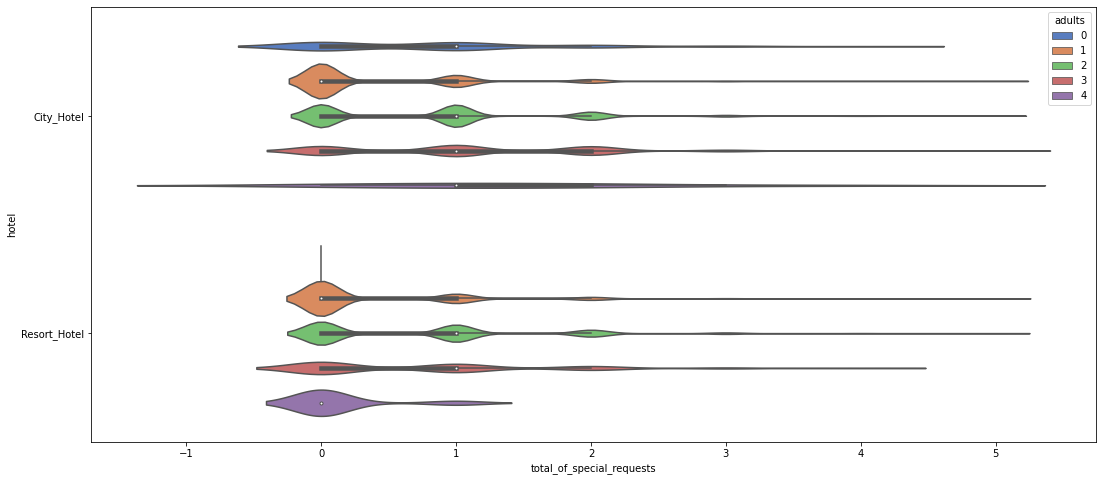

In [88]:
ax = sns.violinplot(x="total_of_special_requests", y="hotel", hue="adults",
                    data=df, palette="muted")

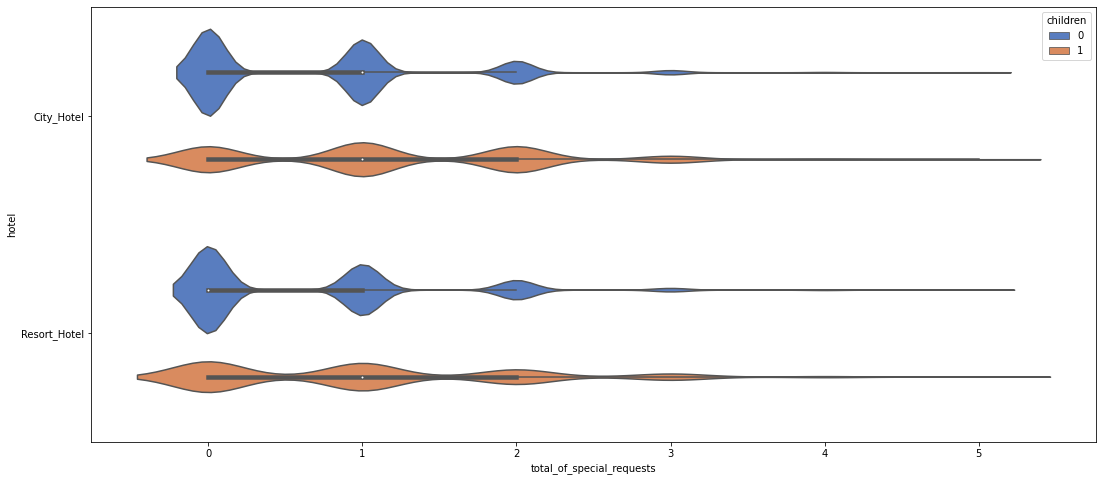

In [89]:
ax = sns.violinplot(x="total_of_special_requests", y="hotel", hue="children",
                    data=df, palette="muted")

In [90]:
#Podemos observar que los adultos tienen muchos mas pedidos especiales que los niños en los dos hoteles, esto es esperable ya que 
#puede que sean los adultos quienes pidan requisitos mas especificos a la hora de reservar. 

In [91]:
# Por ultimo, revisamos la variable 'required_car_parking_spaces'

In [92]:
df['required_car_parking_spaces'].value_counts()

none       44809
parking     4902
Name: required_car_parking_spaces, dtype: int64

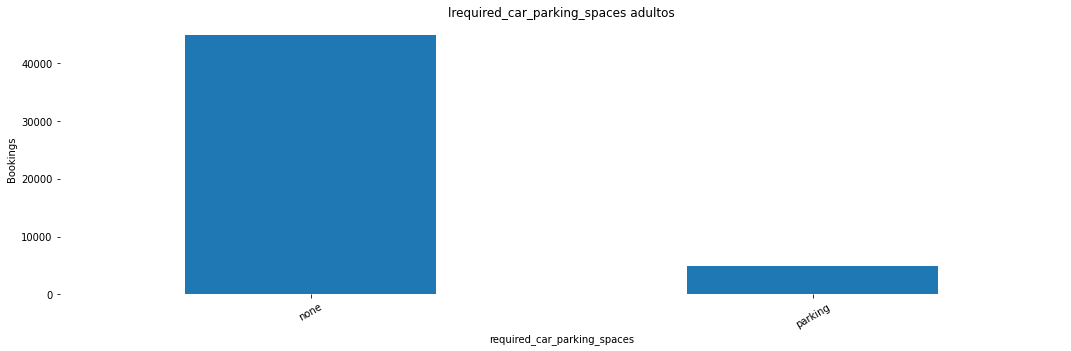

In [93]:
car = df['required_car_parking_spaces'].value_counts()
plt.figure(figsize=(18,5))
car.plot(kind='bar')
plt.xticks(rotation=30)
sns.despine(bottom = True, left = True)
plt.xlabel("required_car_parking_spaces")
plt.ylabel("Bookings")
plt.title("lrequired_car_parking_spaces adultos")
plt.show()

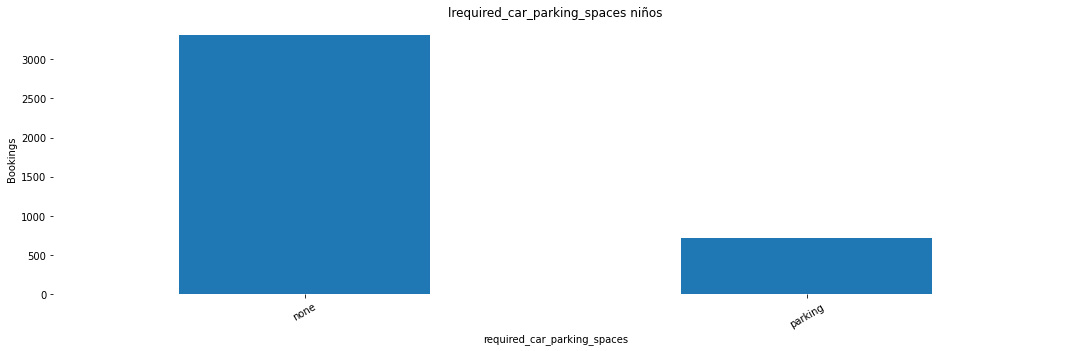

In [94]:
data = df.loc[df['children'] == 1]
car = data['required_car_parking_spaces'].value_counts()
plt.figure(figsize=(18,5))
car.plot(kind='bar')
plt.xticks(rotation=30)
sns.despine(bottom = True, left = True)
plt.xlabel("required_car_parking_spaces")
plt.ylabel("Bookings")
plt.title("lrequired_car_parking_spaces niños")
plt.show()

In [95]:
#Podemos observar que cuando hay niños, se reciba mas espacios de parking que cuando no hay.
#Es probable a que se deba a que para trasladar niños necesitamos un vehiculo para poder transportar mejor sus pertenecias

In [96]:
#Primeras conclusiones: En este punto pudimos revisar todas las variables, ver si tenian valores nulos, si eran categóricas o numéricas,
#y como se distribuían tanto en adultos como en niños, que será nuestra variable a predecir. 
#Ahora nos queda ver que tanto se relacionan estas variables con nuestra variable target, 
#mas alla de los que pudimos ir descubriendo en nuestro EDA, y ver que modelo construiremos para predecirla. 
#Como se trata de una variable categórica, y tenemos las etiquetas para predecirla, podemos construir un modelo supervisado de clasificación.

## Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

In [97]:
#
# Develop Machine/Statistical Learning models to predict the target variable...
#

In [98]:
#Vamos a realizar dos modelos clasicos, que son rapidos de correr y procesar, robustos y donde podemos hacer finetunning con facilidad.

In [99]:
#Limpiamos datos y elegimos features

In [100]:
df = df.drop(columns=['days_in_waiting_list', 'arrival_date', 'country' ]) #droppeamos la columna que sabiamos que contenia casi todos sus valores en 0.
#Ademas, droppeamos las columnas de tiempo y paises, porque no encontramos una relevancia grande en las mismas y si las convertimos en numericas,
#estaremos agregando mucha dimensionalidad a nuestro modelo y eso puede ser contraproducente

In [101]:
df.dtypes

hotel                              object
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
average_daily_rate                float64
required_car_parking_spaces        object
total_of_special_requests           int64
dtype: object

In [102]:
pipeline = pd.get_dummies(df, prefix={'hotel':'hotel ', 'meal':'meal', 'market_segment':'market_segment',
                                      'distribution_channel':'distribution_channel', 'reserved_room_type':'reserved_room_type',
                                      'assigned_room_type':'assigned_room_type', 'deposit_type':'deposit_type','customer_type':'customer_type',
                                      'required_car_parking_spaces': 'required_car_parking_spaces'}, drop_first=True)
#Avanzamos con un get dummys para poder procesar todas las variables categoricas que tenemos en nuestro dataset
#Muchas veces es mejor unir variables para no tener que encodear tantas variables categoricas, pero en este caso, al no ser tantas, avanzamos igual 

In [103]:
pipeline = pipeline.rename({'children': 'target'}, axis=1)

In [104]:
pipeline.corr().sort_values(by = 'target', ascending=False).style.background_gradient(cmap='coolwarm') #observamos la correlacion de nuestras variables con la variable target que es "children"

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,target,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,average_daily_rate,total_of_special_requests,hotel _Resort_Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline_TA/TO,market_segment_Online_TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,required_car_parking_spaces_parking
target,-0.013908,0.026272,0.022778,0.070268,1.000000,-0.041147,-0.016913,-0.028820,0.082086,0.291916,0.139801,0.018451,0.023718,0.021287,-0.066331,-0.010875,0.001999,-0.060691,0.088045,-0.090912,-0.082238,0.090056,0.077074,-0.013852,-0.025067,0.015109,0.071406,0.208274,-0.046631,0.005268,0.239046,0.269844,0.165511,-0.001883,0.030671,0.122728,-0.038691,-0.003110,0.187891,0.249691,0.143839,0.003190,-0.005787,-0.009087,-0.011067,-0.010459,0.115230,-0.110951,0.080873
average_daily_rate,0.016183,0.034600,0.050990,0.329897,0.291916,-0.162197,-0.042988,-0.082685,0.013542,1.000000,0.215629,-0.146470,0.036549,0.142920,-0.020310,-0.011861,-0.183073,-0.155599,0.114002,-0.159802,-0.178908,0.268939,0.053253,0.019560,0.056087,0.001148,-0.027415,0.096026,0.153850,0.100647,0.192718,0.188214,0.106655,0.005288,-0.017247,0.018701,0.015400,0.069828,0.163068,0.179435,0.087152,-0.086111,-0.060369,-0.016287,-0.027765,-0.029809,0.154692,-0.141396,0.085289
reserved_room_type_G,-0.024277,0.016096,0.020638,0.068616,0.269844,0.002552,-0.001487,-0.005825,0.021025,0.188214,0.019366,0.094047,-0.001806,0.009967,-0.040953,-0.006140,0.053325,-0.026444,0.066382,-0.039244,-0.065018,0.033745,0.074962,-0.006297,-0.047806,-0.000605,-0.013436,-0.012396,-0.061948,-0.034632,-0.022060,1.000000,-0.009300,-0.000856,-0.019058,-0.020163,-0.078060,-0.038137,-0.019886,0.836030,-0.003006,0.010616,-0.000640,-0.005031,-0.005810,-0.002517,0.063851,-0.055403,0.098432
assigned_room_type_G,-0.032695,0.003323,0.007883,0.062643,0.249691,0.006572,-0.000718,-0.004978,0.025544,0.179435,0.019494,0.092941,-0.004034,0.004172,-0.043463,-0.008207,0.053124,-0.016984,0.064753,-0.040482,-0.064374,0.030674,0.072457,-0.007254,-0.051718,-0.000697,-0.006069,-0.007007,-0.052492,-0.004121,0.026190,0.836030,-0.001053,-0.000986,-0.023156,-0.025424,-0.089927,-0.045238,-0.030348,1.000000,-0.012335,-0.010714,-0.009424,-0.005796,-0.006694,0.004001,0.065522,-0.058451,0.100609
reserved_room_type_F,-0.034887,0.011006,0.010116,0.057038,0.239046,-0.011254,-0.007264,-0.011903,0.023547,0.192718,0.028071,0.026657,0.002930,-0.006421,-0.044490,-0.004768,0.023179,-0.037094,0.109199,-0.052915,-0.074875,0.030833,0.100933,-0.007628,-0.064064,-0.000733,-0.016278,-0.015018,-0.075050,-0.041957,1.000000,-0.022060,-0.011267,-0.001037,-0.014814,-0.026737,-0.094570,-0.037684,0.763516,0.026190,-0.011369,0.003468,-0.003635,-0.002702,-0.007039,-0.006453,0.071781,-0.073880,0.050596
reserved_room_type_C,-0.008856,0.025424,0.035316,0.041972,0.208274,-0.002223,-0.005313,-0.008535,0.038815,0.096026,0.012722,0.114724,0.041556,0.027494,-0.025880,0.018875,0.003438,-0.016265,0.069223,-0.022418,-0.026223,-0.005920,0.062093,-0.004287,-0.044249,-0.000412,-0.009147,1.000000,-0.042173,-0.023577,-0.015018,-0.012396,-0.006331,-0.000583,-0.010653,0.522882,-0.051612,-0.024263,-0.016760,-0.007007,0.015116,0.003327,-0.005569,-0.003425,0.001182,0.000011,0.032690,-0.028507,0.057758
assigned_room_type_F,-0.035267,-0.004178,-0.003430

In [105]:
#Ya podemos observar que la que mas correlacion pareciera tener con nuestro target es average_daily_rate, como habiamos visto previamente en nuestro EDA.
#Debemos revisar si existen correlaciones mayores a 0.8 o menores a -0.8 tomandolo como threshold ya que una correlaicon tan alta o tan baja deberia obligarnos a eliminar esa feature.
#En este caso, vemos que la columna customer_type_Transient-Party es la unica que traspasa este threshold. Vamos entonces a eliminarla. 

In [106]:
pipeline = pipeline.drop(columns=['customer_type_Transient-Party'])

In [107]:
features = [i for i in pipeline.columns if i not in ["target"]]

In [108]:
#Variable target . Investiguemos si nuestra variable a predecir esta desbalanceada, lo cual podria pasarnos

In [109]:
pipeline['target'].value_counts() #como sospechabamos, esta desbalanceada. Es decir, tenemos mas etiquetas de estadias sin niños, lo cual 
#va a terminar haciendo que nuestro modelo prediga mejor la etiqueta 0. Tenemos que balancear los casos.

0    45685
1     4026
Name: target, dtype: int64

In [110]:
#Hay diversos metodos de undersampling y oversampling para atacar el problema del desequilibrio de clases.
#Pero en esta ocasión elegi utilizar el método SMOTE. SMOTE (técnica de sobremuestreo de minorías sintéticas) es uno de los métodos de sobremuestreo más utilizados.
#Lo que hace es buscar equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.

### Modelado

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, classification_report, plot_confusion_matrix, confusion_matrix, mean_squared_error, fbeta_score
from sklearn.kernel_approximation import PolynomialCountSketch

### Random Forest

In [116]:
from imblearn.over_sampling import SMOTE

In [119]:
X = pipeline[features].copy()
y = pipeline["target"].copy()

In [120]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [121]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (68610, 47)
After OverSampling, the shape of train_y: (68610,) 

After OverSampling, counts of label '1': 34305
After OverSampling, counts of label '0': 34305


In [122]:
scaler = StandardScaler().fit(X_train_res) #StandardScaler estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1
x_train = scaler.transform(X_train_res)
x_test = scaler.transform(x_test)

In [123]:
randomForest = RandomForestClassifier()

In [124]:
randomForest.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [125]:
y_pred = randomForest.predict(x_test)

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [126]:
fbeta_score(y_test, y_pred, beta=2)

0.19367893621121599

In [127]:
f1_score(y_test, y_pred)

0.19657701711491443

In [128]:
confusion_matrix(y_test, y_pred)

array([[10584,   796],
       [  847,   201]])

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


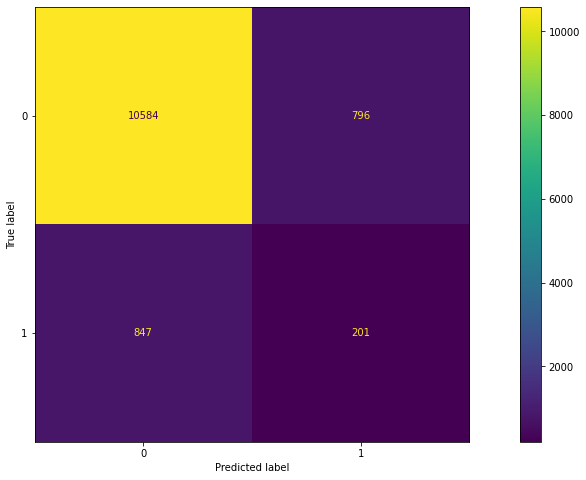

In [129]:
plot_confusion_matrix(randomForest, x_test, y_test)
plt.show();

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11380
           1       0.20      0.19      0.20      1048

    accuracy                           0.87     12428
   macro avg       0.56      0.56      0.56     12428
weighted avg       0.86      0.87      0.87     12428



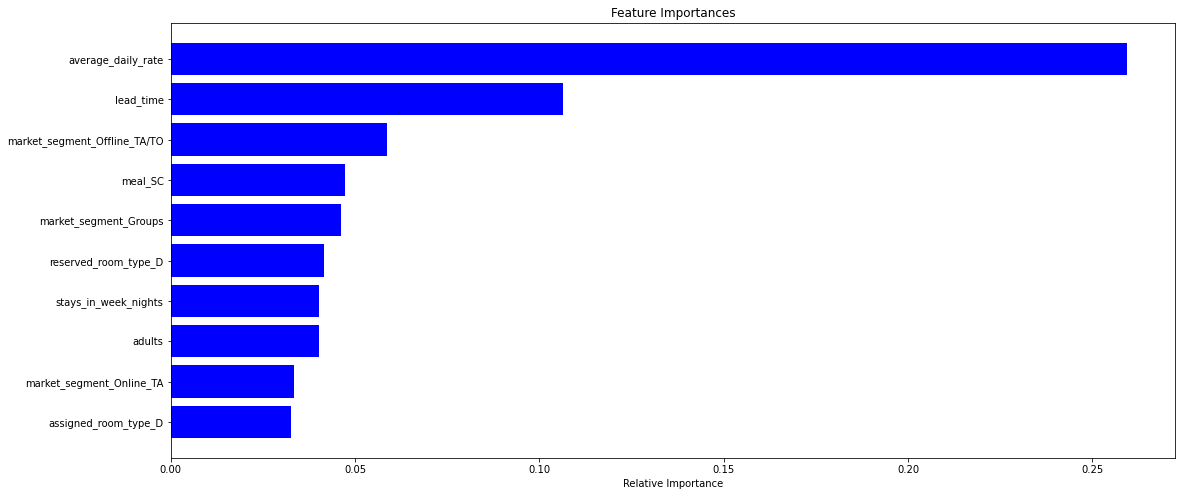

In [131]:
importances = randomForest.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 
plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show() #veamos las 10 primeras variables mas importantes que uso el modelo para predecir nuestro target 

### Logistic Regression

In [132]:
logisticRegr = LogisticRegression(solver='liblinear')

In [133]:
logisticRegr.fit(X_train_res, y_train_res)

LogisticRegression(solver='liblinear')

In [134]:
y_pred = logisticRegr.predict(x_test)

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [135]:
logisticRegr.score(x_test, y_test)

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.5279208239459285

In [136]:
fbeta_score(y_test, y_pred, beta=2)

0.36327421037655316

In [137]:
f1_score(y_test, y_pred)

0.20705500743343694

In [138]:
confusion_matrix(y_test, y_pred)

array([[5795, 5585],
       [ 282,  766]])

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


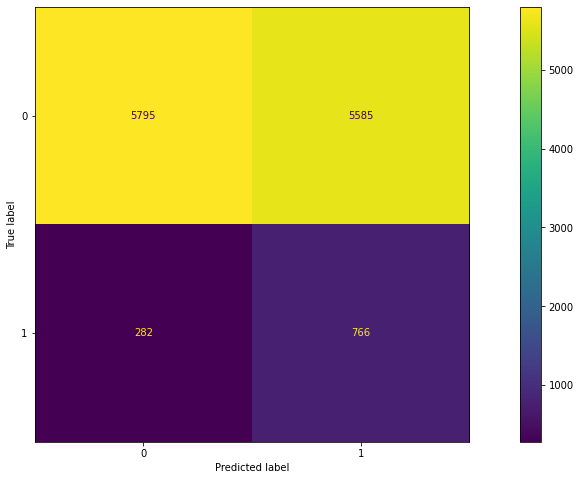

In [139]:
plot_confusion_matrix(logisticRegr, x_test, y_test)
plt.show();

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.51      0.66     11380
           1       0.12      0.73      0.21      1048

    accuracy                           0.53     12428
   macro avg       0.54      0.62      0.44     12428
weighted avg       0.88      0.53      0.63     12428



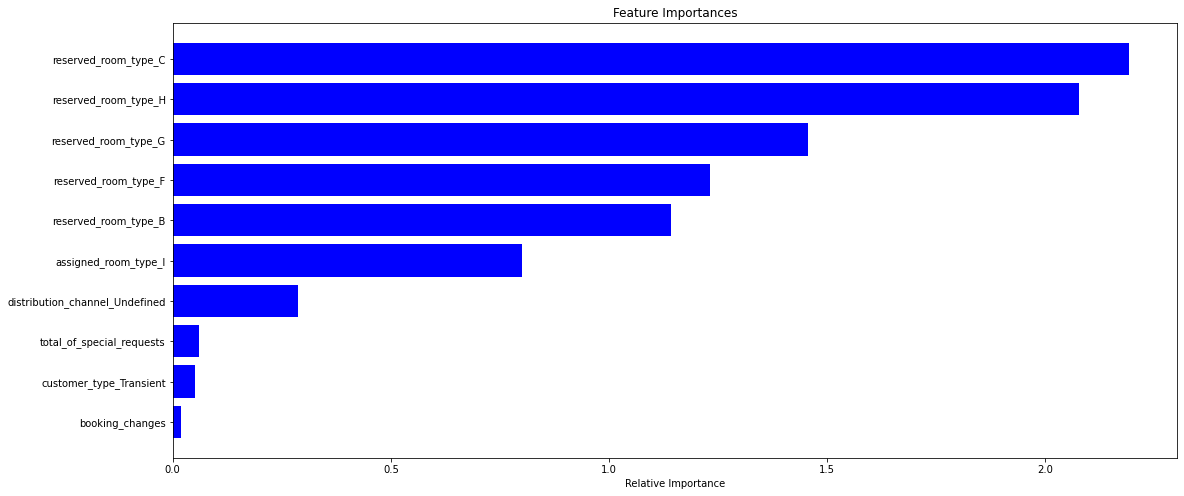

In [141]:
importances = logisticRegr.coef_[0]
indices = np.argsort(importances)

# customized number 
num_features = 10 
plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

## Part III - Results & Conclusions

In [ ]:
#
# List your key insights / findings and conclusions...
#

### Storytelling

### Primera parte - EDA

Empecemos por el principio. La primera tarea que teníamos era predecir si en alguno de los dos hoteles que tenemos en el complejo hotelero, iban a hospedarse niños.
Esa era nuestra variable a predecir. Lo primero que realizamos fue entonces una investigación. Revisamos todos los datos con los que contabamos, para ver la relación 
que tenia nuestra variable a predecir con las demas variables. Descubrimos que los niños se quedaban mas en el hotel de la ciudad que en el resort, que no siempre obtenían la 
habitación que sus padres les pedian, y que las necesidades de estacionamiento aumentaban cuando los adultos traian niños al hotel, entre otros descubrimientos.
Poder observar todo esto es fundamental para saber con que información contabamos a la hora de predecir si habrá una reserva con niños en nuestro hotel.
Despues de haber graficado nuestras columnas, y de habernos asegurado que contamos con un dataset limpio, nos adentramos a pensar en un modelo para predecir.
El modelo elegido fue uno supervisado, porque teníamos las etiquetas que necesitabamos predecir, es decir, teníamos una columna que era nuestro ¨target¨, y a la vez 
utilizamos un modelo de clasificacin. Esto se debe al hecho de que necesitabamos clasificar si vamos a tener o no niños en el hotel. Es decir, una categoria que es si o no, 
y que en este caso estamos expresando en numeros, pero que no siguen un orden continuo, sino que se trata de dos categorias.

### Modelado

Para el modelado elegimos hacer dos modelos. Siempre es recomendable hacer mas de uno, para tener con qué comparar y saber mas acerca del modelo que elegiste.
En este caso el Random Forest es un modelo clasico, que combina diferentes arboles predictores, buscando las features que le permitan llegar mas rapido a la variable a predecir.
Y la regresion logistica por su parte, permite predecir la probabilidad de que ocurra un evento (valor de 1) o no (valor de 0) a partir de la optimización de los coeficientes de regresión. 
Este resultado siempre varía entre 0 y 1. Cuando el valor predicho supera un umbral, es probable que ocurra el evento, mientras que cuando ese valor está por debajo del mismo umbral, no es así.
Aplicamos ambos modelos, ayudandonos de algunas técnicas como el Smote, que nos permitió balancear las clases, ya que teniamos mas etiquetas de ¨no niños¨que etiquetas
de ¨si niños¨.

### Resultados

Para ver los resultados nos basamos en la siguiente metrica: f1_score
El valor F1, o f1score, se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder interpretar resultados.
Pero primero tenemos que entender a que hacen referencia precision y recall. La precisión es la fracción de todas las instancias relevantes dividido entre las instancias obtenidas.
Es decir, de todas las etiquetas predichas, cuantas efectivamente pertenecen a la categoria correcta.
Por otro lado, el recall representa la fracción de instancias relevantes que se han obtenido sobre la cantidad total de instancias relevantes. Es decir, de la cantidad de etiquetas predichas como 
"estadia con niño", efectivamente en la realidad se tratan de etiquetas de "estadia con niño". La combinacion de ambas, es el f1 score, el cual nos indica entonces que tan bueno es nuestro modelo. 
En este caso, ambos modelos superan en su weighted average f1score al 0,5. Es decir, superan al azar.
Son modelos que pueden predecir mejor que el azar, mejor que tirar una moneda al aire para poder realizar la predicción.

*El puntaje F1 weighted average se calcula tomando la media de todos los puntajes F1 por clase mientras se considera el apoyo (peso) de cada una de nuestras etiquetas.

#### Que modelo funcionó mejor entonces?

A simple vista, el modelo que mejor nos esta funcionando es el random forest. El mismo tiene un weighted average f1score de 0,87, mientras que nuestra regresión logistica tiene
el mismo valor en 0,63.

#### Confusion matrix

Tambien vamos a observar nuestra matriz de confusión. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. 
Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo las dos clases.
En este caso podemos ver que en el random forest, estamos prediciendo muy bien cuando los nilños no vienen al hotel y nos equivocamos de etiqueta muy pocas veces.
Por el contrario, en la regresión logística, confundimos muchas veces la etiqueta "no niños" con la etiqueta de "estadia con niños". 
Pero, al hablar de la etiqueta "estadia con niños", pasa lo contrario. Nuestro random forest confunde mas esa etiqueta con la de "no niños", y nuestra regresión logística predice mejor esa etiqueta.
Entonces, aca si bien vimos que el modelo que mejor performa en f1score es el random forest, es el que peor predice si va a haber niños en el hotel. Entonces para elegir 
con cual modelo quedarnos, tambien podemos abrir el debate sobre que preferimos, errale a la etiqueta "con niños" y que finalmente no vengan al hotel, o 
errarle mas veces a la etiqueta "sin niños" y que efectivamente si vengan. A nivel negocio, es una buena discusion que podemos tener.
Tenemos que decidir en base a lo que necesita el negocio, y es por eso que es tan importante mirar cada metrica en profundidad, antes de
abocarnos a elegir un modelo por sobre otro.
A nivel implementación, y puntajes en general, podemos elegir el random forest e implemetarlo facilmente, ir luego de deployarlo ir viendo como se comporta y mejorándolo
a medida que avanza su tiempo en producción.

#### Conclusiones y posibles Next steps

Podemos concluir en implementar nuestro Random Forest. Pero tambien podríamos hacer un modelo de boosting, como por ejemplo un xgboost, cuya lógica se basa en tomar los pesos de los 
errores que cometieron modelos anteriores, y asi mejorar su predicción. Podemos además hacer finetunning y mejorar los parametros del random forest, agregando por ejemplo un gridsearch, 
que nos ayude a elegir mejor la profundidad de las ramas de nuestros arboles.
También podemos agregar features nuevas, construirlas entre features ya existentes, o aumentar la cantidad de datos que tenemos, segun lo que creamos necesario para que nuestro modelo
continue incrementando su capacidad para predecir correctamente, adecuandose así a las necesidades que nos demanda el negocio. 